In [19]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

import PIL
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
from palettable.colorbrewer.sequential import PuRd_8

In [75]:
train = pd.read_csv('ASRS_DBOnline.csv')
test = pd.read_csv('ASN database.csv')

In [74]:
cate = pd.read_csv('category.csv')

In [3]:
print(train.shape)
print(test.shape)

(170, 96)
(612, 19)


In [4]:
#train.info()

- We'll use all cells whose ACN is non-null

In [9]:
train['ACN'].dropna(inplace=True)

- Clean the text

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
train['Synopsis'] = train['Synopsis'].apply(lambda x:clean_text(x))

train['Narrative'] = train['Narrative'].apply(lambda x:clean_text(x))

train['Anomaly'] = train['Anomaly'].apply(lambda x:clean_text(x))

train['Contributing Factors / Situations'] = train['Contributing Factors / Situations'].apply(lambda x:clean_text(x))

train['Human Factors'] = train['Human Factors'].apply(lambda x:clean_text(x))

train['Primary Problem'] = train['Primary Problem'].apply(lambda x:clean_text(x))

- Remove unnecessary words

In [12]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [13]:
train['cau_list'] = train['Contributing Factors / Situations'].apply(lambda x:str(x).split())
train['cau_list'] = train['cau_list'].apply(lambda x:remove_stopword(x))
cautop = Counter([item for sublist in train['cau_list'] for item in sublist])
cau = pd.DataFrame(cautop.most_common(100))
cau.columns = ['Common_words','count']

fig = px.treemap(cau, 
                path=['Common_words','count'], 
                values='count',
                title='Tree of Most Common Cause',
                color='count',
                color_continuous_scale=px.colors.diverging.Portland,
                width=1200, height=1000)
fig.show()

In [16]:
checkhumanerror = pd.DataFrame(train.groupby('Contributing Factors / Situations').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False))
checkhumanerror.style.background_gradient(cmap='Set2')
checkhumanerror.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/ContributingFactor.csv')

,Contributing Factors / Situations,ACN
38,human factors,45
43,human factors procedure,17
0,aircraft,14
50,procedure,8
19,airspace structure human factors,6
8,aircraft procedure,5
54,procedure human factors,5
27,chart or publication procedure,4
34,environment non weather related human factors,4
5,aircraft human factors,3


In [14]:
train['prim_list'] = train['Primary Problem'].apply(lambda x:str(x).split())
train['prim_list'] = train['prim_list'].apply(lambda x:remove_stopword(x))
primtop = Counter([item for sublist in train['prim_list'] for item in sublist])
prim = pd.DataFrame(primtop.most_common(200))
prim.columns = ['Common_words','count']


fig = px.treemap(prim, 
                path=['Common_words','count'], 
                values='count',
                title='Tree of Most Common Words in Primary Problem',
                color='count',
                color_continuous_scale=px.colors.sequential.Sunset,
                width=1200, height=1000)

fig.show()

In [15]:
PrimaryProblem = pd.DataFrame(train.groupby('Primary Problem').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False))
PrimaryProblem.style.background_gradient(cmap='Set2')
#PrimaryProblem.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/PrimaryProblem.csv')

,Primary Problem,ACN
7,human factors,85
9,procedure,34
0,aircraft,20
2,ambiguous,17
10,weather,4
5,company policy,3
1,airspace structure,2
4,chart or publication,2
3,atc equipment nav facility buildings,1
6,equipment tooling,1


In [29]:
HUMANFACTOR = pd.DataFrame(train.groupby('Human Factors').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False))
HUMANFACTOR.style.background_gradient(cmap='Set2')
HUMANFACTOR.to_csv(r'/Users/wei/Desktop/GitHub/SMS-for-UAV/Human Factors.csv')

In [119]:
train['hum_list'] = train['Human Factors'].apply(lambda x:str(x).split())
train['hum_list'] = train['hum_list'].apply(lambda x:remove_stopword(x))
humtop = Counter([item for sublist in train['hum_list'] for item in sublist])
hum = pd.DataFrame(humtop.most_common(200))
hum.columns = ['Common_words','count']


fig = px.treemap(hum, 
                path=['Common_words','count'], 
                values='count',
                title='Tree of Most Common Words in Human Factors',
                color='count',
                color_continuous_scale=px.colors.qualitative.Set3,
                width=1200, height=1000)
fig.show()

In [24]:
train['nar_list'] = train['Narrative'].apply(lambda x:str(x).split())
train['nar_list'] = train['nar_list'].apply(lambda x:remove_stopword(x))
nartop = Counter([item for sublist in train['nar_list'] for item in sublist])
nar = pd.DataFrame(nartop.most_common(100))
nar.columns = ['Common_words','count']

fig = px.treemap(nar, 
                path = ['Common_words','count'], 
                values='count',
                title='Tree of Most Common Words in Narrative',
                color='count',
                color_continuous_scale="dense",
                width=1200, height=1000)
fig.show()

In [25]:
train['syn_list'] = train['Synopsis'].apply(lambda x:str(x).split())
train['syn_list'] = train['syn_list'].apply(lambda x:remove_stopword(x))
syntop = Counter([item for sublist in train['syn_list'] for item in sublist])
syn = pd.DataFrame(syntop.most_common(200))
syn.columns = ['Common_words','count']

fig = px.treemap(syn, 
                path=['Common_words','count'], 
                values='count',
                title='Tree of Most Common Words in Synopsis',
                color='count',
                color_continuous_scale=px.colors.sequential.thermal,
                width=1200, height=1000)
fig.show()

- Compare with Anomaly

In [26]:
train['ano_list'] = train['Anomaly'].apply(lambda x:str(x).split())
train['ano_list'] = train['ano_list'].apply(lambda x:remove_stopword(x))
anotop = Counter([item for sublist in train['ano_list'] for item in sublist])
ano = pd.DataFrame(anotop.most_common(200))
ano.columns = ['Common_words','count']

fig = px.treemap(ano, 
                path=['Common_words','count'], 
                values='count',
                title='Tree of Most Common Words in Anomaly',
                color='count',
                color_continuous_scale='Spectral',
                width=1200, height=1000)
fig.show()

- Qualification & Certification

In [76]:
qualification = train.groupby('Qualification').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
qualification.style.background_gradient(cmap='Set2')


,Qualification,ACN
0,Air Traffic Control Fully Certified,32
38,Flight Crew Private,22
6,Flight Crew Commercial,15
10,Flight Crew Commercial; Flight Crew Instrument,5
28,Flight Crew Instrument; Flight Crew Multiengine; Flight Crew Commercial; Flight Crew Flight Instructor,4
26,Flight Crew Instrument; Flight Crew Multiengine; Flight Crew Air Transport Pilot (ATP); Flight Crew Flight Instructor,4
34,Flight Crew Multiengine; Flight Crew Commercial; Flight Crew Instrument,3
29,Flight Crew Instrument; Flight Crew Private,3
19,Flight Crew Flight Instructor; Flight Crew Instrument; Flight Crew Multiengine; Flight Crew Commercial,2
37,Flight Crew Multiengine; Flight Crew Instrument; Flight Crew Flight Instructor; Flight Crew Commercial,2


In [28]:
problem = train.groupby('Problem').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)

trace = go.Funnel(
    y =problem['Problem'],
    x = problem['ACN'],
    textinfo = "value+percent initial")

layout = go.Layout(title = "Funnel-Chart of Problem Distribution",
    margin = {"l": 20, "r": 20})

go.Figure([trace],layout)


- Flight Condition distribution

In [29]:
flycondition = train.groupby('Flight Conditions').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
flycondition.style.background_gradient(cmap='Wistia')

,Flight Conditions,ACN
3,VMC,102
0,IMC,5
2,Mixed,3
1,Marginal,1


In [30]:
trace = go.Funnel(
    y =flycondition['Flight Conditions'],
    x = flycondition.ACN,
    textinfo = "value+percent initial")

layout = go.Layout(title = "Funnel-Chart of Flight Condition Distribution",
    margin = {"l": 20, "r": 20})

go.Figure([trace],layout)

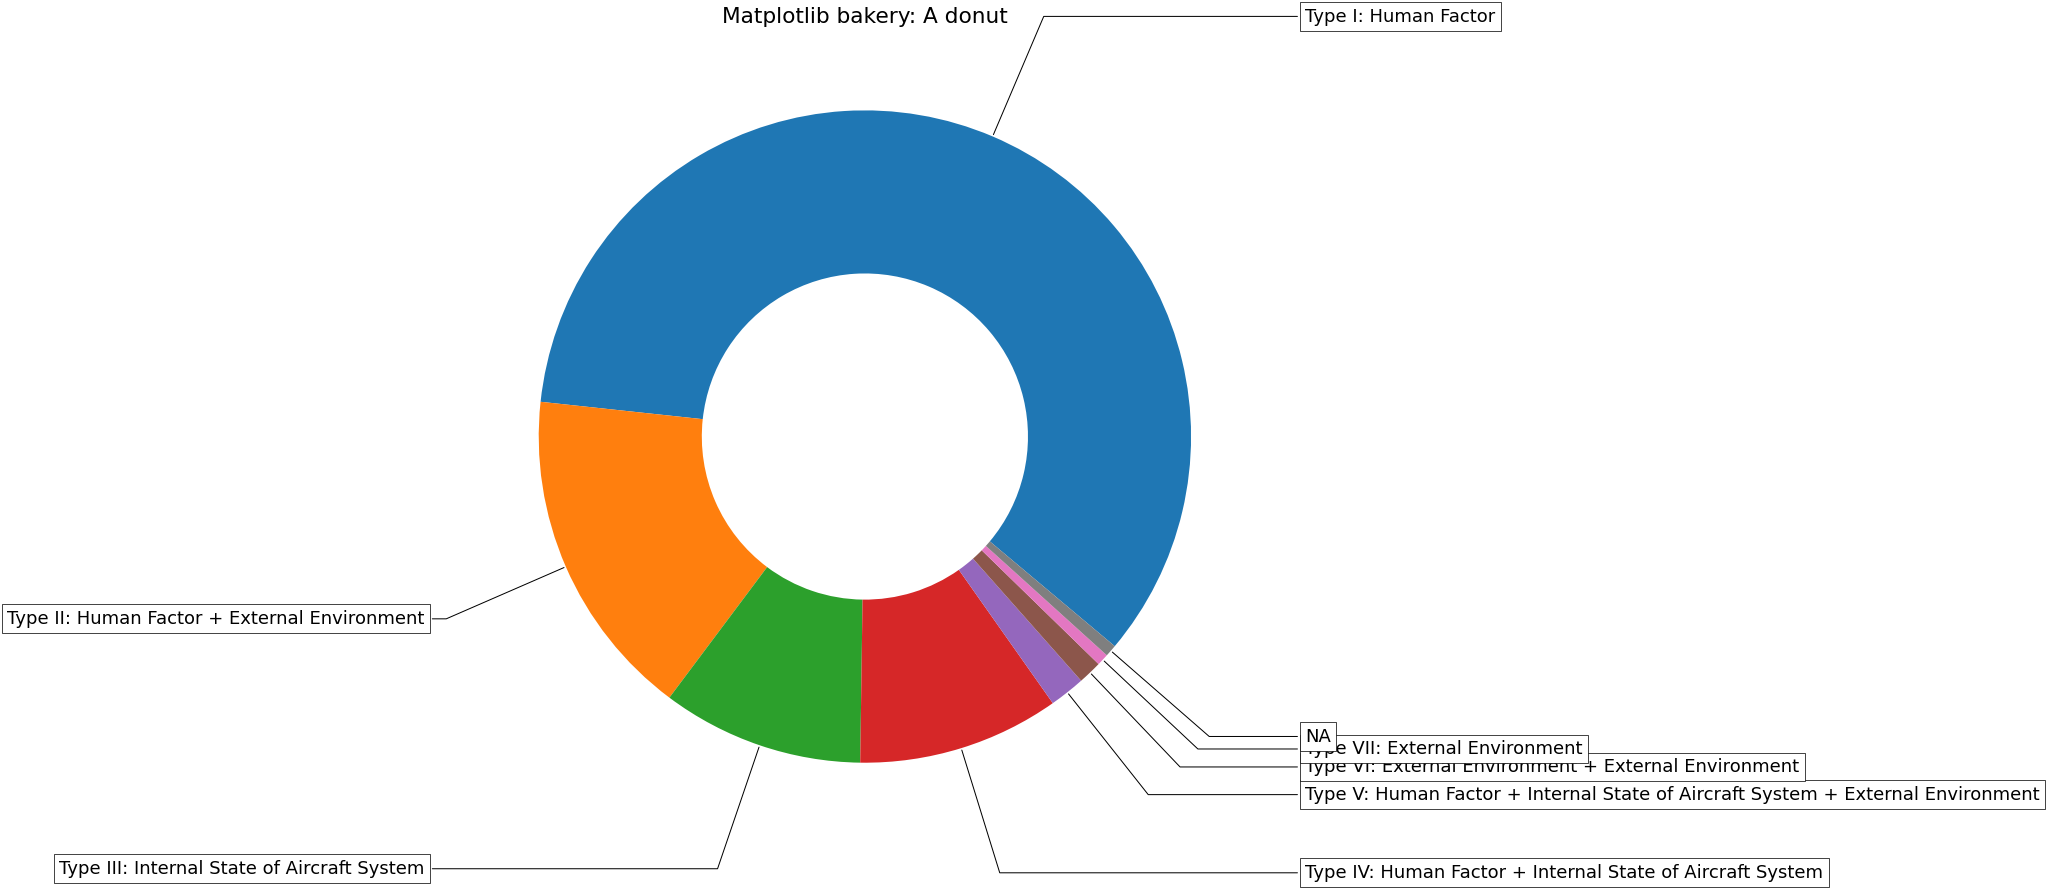

In [69]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

recipe = ["Type I: Human Factor", 
    "Type II: Human Factor + External Environment", 
    "Type III: Internal State of Aircraft System", 
    "Type IV: Human Factor + Internal State of Aircraft System", 
    "Type V: Human Factor + Internal State of Aircraft System + External Environment", 
    "Type VI: External Environment + External Environment",
    "Type VII: External Environment",
    "NA"]

data =  [101,28,17,17,3,2,1,1]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

<Figure size 432x288 with 0 Axes>

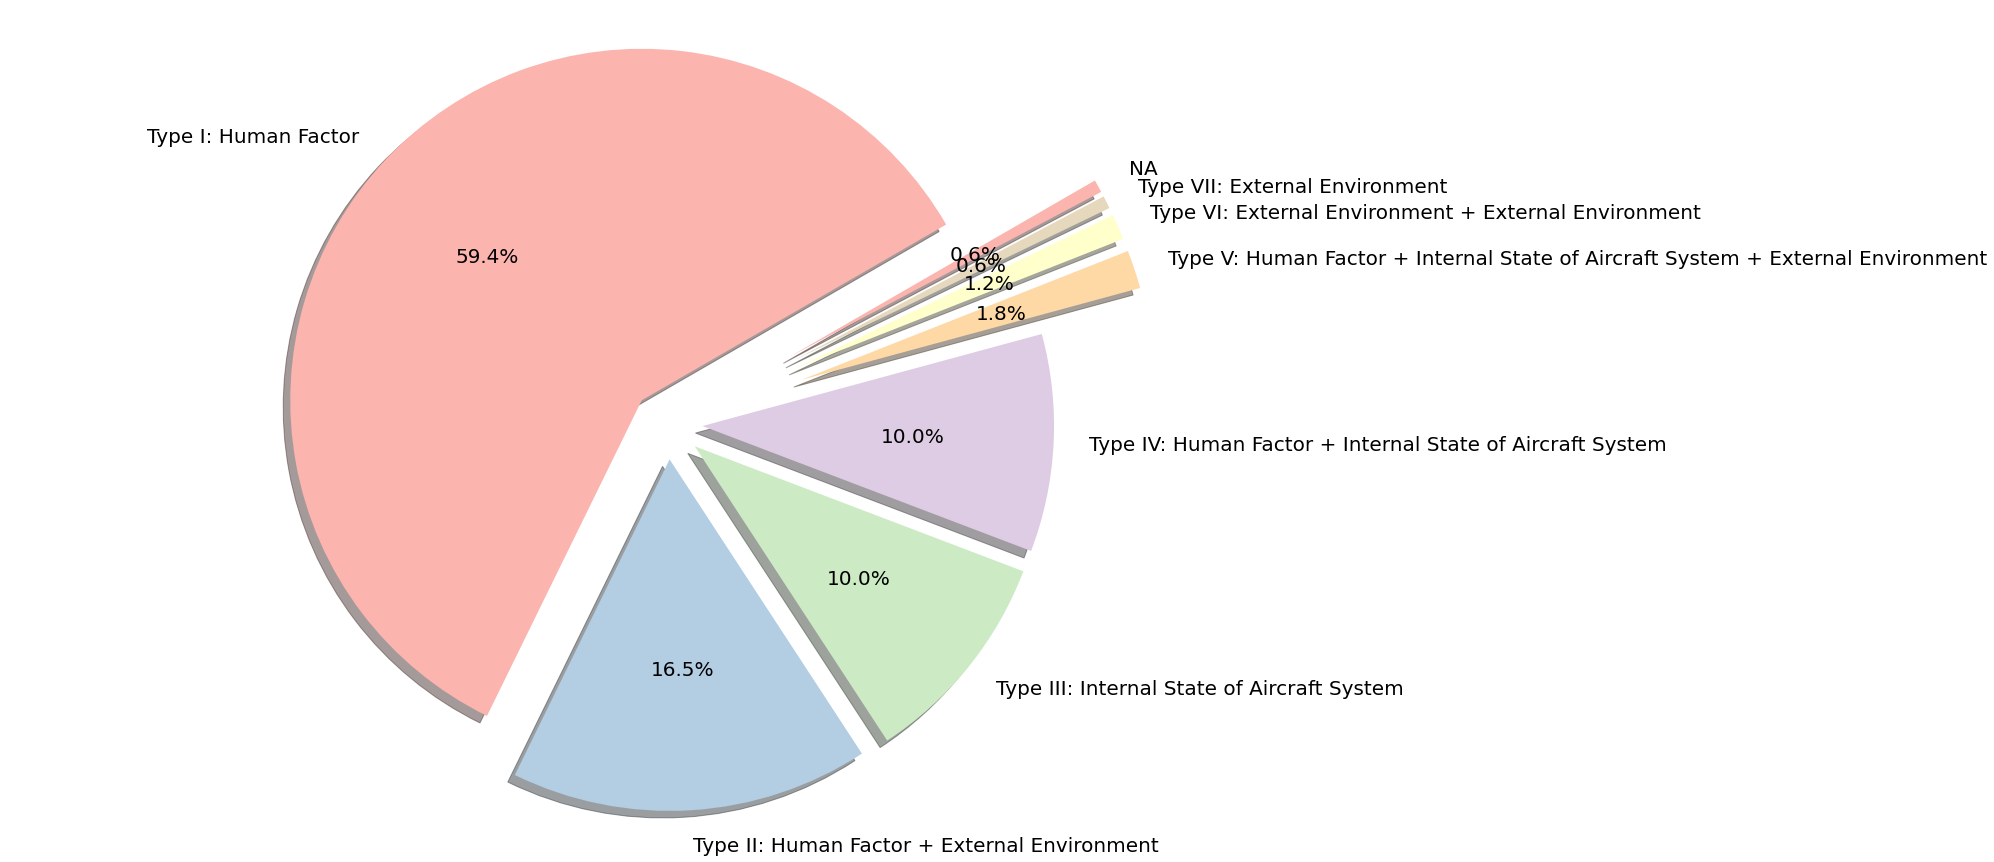

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(27,13))
fig.patch.set_facecolor('white')
labels = ["Type I: Human Factor", 
    "Type II: Human Factor + External Environment", 
    "Type III: Internal State of Aircraft System", 
    "Type IV: Human Factor + Internal State of Aircraft System", 
    "Type V: Human Factor + Internal State of Aircraft System + External Environment", 
    "Type VI: External Environment + External Environment",
    "Type VII: External Environment",
    "NA"]
sizes = [101,28,17,17,3,2,1,1]
colors = Pastel1_7.hex_colors
explode = (0.1,0.1,0.1,0.1,0.4,0.4,0.4,0.4)
plt.pie(sizes, colors = colors, 
labels=labels, autopct='%1.1f%%', shadow=True,
startangle=30, explode = explode)
plt.rcParams.update({'font.size': 40})
plt.axis('equal')
plt.tight_layout()


In [16]:
import plotly.express as px
fig = px.funnel_area(names=["Type I: HF","Type II: HF + EE", "Type III: UAV", "Type IV: HF + UAV", 
"Type V: HF + UAV + EE", "Type VI: EE + UAV", "Type VII: EE","NA"],
                    values=[101,28,17,17,3,2,1,1])


fig.update_layout(
    title="Mishap Contributors",
    font=dict(family='Times New Roman',
    size=20),
    autosize=False,
    width=1000,
    height=1000)

fig.show()

In [3]:
from plotly import graph_objects as go
fig = go.Figure(go.Funnel(
y = ["Type I: HF", 
    "Type II: HF + EE", 
    "Type III: UAV", 
    "Type IV: HF + UAV", 
    "Type V: HF + UAV + EE", 
    "Type VI: EE + UAV",
    "Type VII: EE",
    "NA"],
x = [101,28,17,17,3,2,1,1],
textposition = "inside",
textinfo = "percent total + value",
marker = {"color": ['rgb(103,0,31)', 'rgb(178,24,43)', 'rgb(214,96,77)', 'rgb(244,165,130)', 'rgb(253,219,199)', 'rgb(247,247,247)', 'rgb(209,229,240)', 'rgb(146,197,222)']}))

fig.update_layout(
    title="Contributors",
    font=dict(family='Times New Roman',
    size=30,
    color='rgb(34,38,45)'),
    autosize=False,
    width=1500,
    height=1500,
    plot_bgcolor='white')

fig.show()


In [37]:
import plotly.express as px

print(px.colors.sequential.haline)

['rgb(41, 24, 107)', 'rgb(42, 35, 160)', 'rgb(15, 71, 153)', 'rgb(18, 95, 142)', 'rgb(38, 116, 137)', 'rgb(53, 136, 136)', 'rgb(65, 157, 133)', 'rgb(81, 178, 124)', 'rgb(111, 198, 107)', 'rgb(160, 214, 91)', 'rgb(212, 225, 112)', 'rgb(253, 238, 153)']


In [79]:
print(px.colors.sequential.RdPu)

['rgb(255,247,243)', 'rgb(253,224,221)', 'rgb(252,197,192)', 'rgb(250,159,181)', 'rgb(247,104,161)', 'rgb(221,52,151)', 'rgb(174,1,126)', 'rgb(122,1,119)', 'rgb(73,0,106)']


- Mishap time distribution

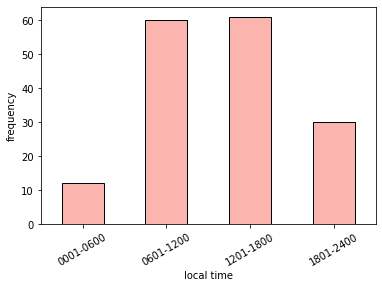

In [84]:
colors = Pastel1_7.hex_colors
time_data = train.groupby('Local Time Of Day').count()['ACN'].reset_index().sort_values(by='Local Time Of Day',ascending=False)
time_order = ['0001-0600','0601-1200','1201-1800','1801-2400']
time_data = time_data.set_index('Local Time Of Day').loc[time_order].plot(color=colors,
            kind="bar", legend=False, edgecolor='black')
plt.xticks(rotation=30)
plt.xlabel('local time')
plt.ylabel('frequency')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

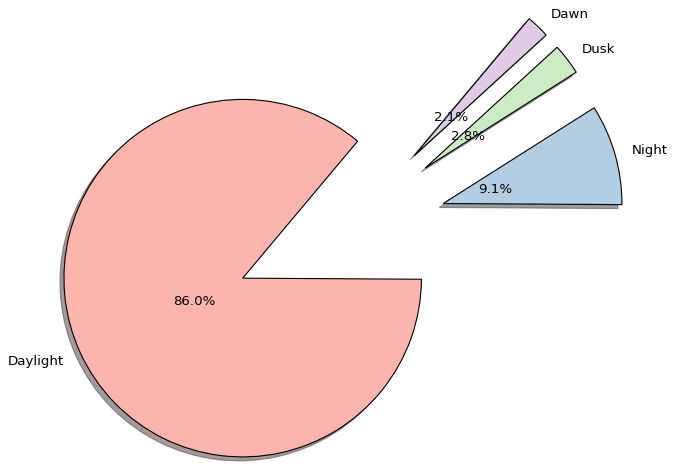

In [32]:
lightcondition = train.groupby('Light').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
fig = plt.figure()
fig.patch.set_facecolor('white')
labels = lightcondition['Light']
sizes = lightcondition['ACN']
colors = Pastel1_7.hex_colors
explode = (0.6,0.6,0.6,0.6)
plt.pie(sizes, colors = colors, 
labels=labels, autopct='%1.1f%%', shadow=True,
startangle=50, pctdistance=0.3,explode = explode)
plt.tight_layout()

In [180]:
phase = train.groupby('Flight Phase').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
phase.style.background_gradient(cmap='Set3')

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
colors = ['#E69F00']
time_data.time.hist(color = colors)
plt.xlabel('local time')
plt.ylabel('frequency')

,Flight Phase,ACN
3,Cruise,101
0,Climb,9
16,Takeoff,7
6,Descent,6
10,Landing,4
8,Initial Approach,4
1,Climb; Cruise,2
12,Other All Phases,2
11,Other All,2
9,Initial Climb,2


In [201]:
fig = px.bar(phase, x="ACN", y="Flight Phase", 
title='Flight Phase Distribution in Mishap', orientation='h', 
             width=700, height=700,color='Flight Phase')
fig.show()

In [210]:
oplocation = train.groupby('Location Of Person').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
oplocation.style.background_gradient(cmap='Pastel2')

,Location Of Person,ACN
22,Hangar / Base,64
21,Gate / Ramp / Line,31
0,Aircraft X,15
1,Company,12
17,Facility ZMP.ARTCC,7
15,Facility ZLA.ARTCC,5
5,Facility FAR.Tower,2
2,Facility CRP.TRACON,2
7,Facility Inspection site,2
20,Facility ZZZ.Tower,2


In [78]:
detecttime = train.groupby('When Detected').count()['ACN'].reset_index().sort_values(by='ACN',ascending=False)
detecttime.style.background_gradient(cmap='tab20b')

,When Detected,ACN
1,In-flight,109
12,Routine Inspection,21
4,Other Post Flight,7
11,Pre-flight,3
13,Taxi,3
6,Other UAV Operator,2
7,Other after flight,2
8,Other after mission,2
9,Other drone operator,2
0,Aircraft In Service At Gate,1


In [79]:
fig = px.bar(detecttime, x="ACN", y="When Detected", 
title='Detect Time Distribution in Mishap', orientation='h', 
             width=700, height=700,color='When Detected')
fig.show()